### Importación de librerías
Importa todas las librerías necesarias para el procesamiento de datos, visualización, creación y evaluación de modelos de machine learning, y almacenamiento de modelos.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, RidgeCV, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.impute import SimpleImputer


import pickle
import joblib

### Carga de datos
Carga el archivo CSV con los datos procesados y muestra las primeras cinco filas del DataFrame para verificar su contenido.

In [4]:
df = pd.read_csv("C:/Users/Acer/OneDrive/Escritorio/Workshops y Proyectos/workshop3/datos/datos_procesados.csv")
df.head()

,Country,Region,Happiness_Rank,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Year,Cluster,Happiness_Level,Happiness Category
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015,2.0,Alto,feliz
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015,2.0,Alto,feliz
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015,2.0,Alto,feliz
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015,2.0,Alto,feliz
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015,2.0,Alto,feliz


### Inspección de columnas
Muestra todas las columnas del DataFrame para identificar las variables disponibles y facilitar el análisis posterior.

In [5]:
df.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom',
       'Corruption_Perception', 'Generosity', 'Dystopia_Residual', 'Year',
       'Cluster', 'Happiness_Level', 'Happiness Category'],
      dtype='object')

## Preprocesamiento

### Eliminación de columnas innecesarias
Elimina columnas que no son relevantes para el modelo, como identificadores, rangos y columnas relacionadas con errores o intervalos de confianza, ignorando posibles errores si las columnas no existen.

In [6]:
columns_to_drop = [
    'Happiness_Rank', 'Standard_Error', 'Lower_Confidence_Interval',
    'Upper_Confidence_Interval', 'Whisker_High', 'Whisker_Low',
    'Country', 'Year'
]

df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')


### Visualización de datos limpios
Muestra las primeras cinco filas del DataFrame limpio tras la eliminación de columnas innecesarias para verificar los cambios.

In [7]:
df_cleaned.head()

,Region,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Cluster,Happiness_Level,Happiness Category
0,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2.0,Alto,feliz
1,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2.0,Alto,feliz
2,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2.0,Alto,feliz
3,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2.0,Alto,feliz
4,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2.0,Alto,feliz


### Inspección de datos limpios
Muestra información detallada del DataFrame `df_cleaned`, incluyendo el número de entradas, columnas, tipos de datos y la presencia de valores nulos, para verificar la estructura y calidad de los datos tras el preprocesamiento.

In [8]:
df_cleaned.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 782 entries, 0 to 781
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Region                 782 non-null    object 
 1   Happiness_Score        782 non-null    float64
 2   GDP_per_Capita         782 non-null    float64
 3   Social_Support         782 non-null    float64
 4   Life_Expectancy        782 non-null    float64
 5   Freedom                782 non-null    float64
 6   Corruption_Perception  782 non-null    float64
 7   Generosity             782 non-null    float64
 8   Dystopia_Residual      470 non-null    float64
 9   Cluster                782 non-null    float64
 10  Happiness_Level        782 non-null    object 
 11  Happiness Category     782 non-null    object 
dtypes: float64(9), object(3)
memory usage: 73.4+ KB


### Eliminación de filas con valores nulos en Dystopia_Residual
Elimina las filas del DataFrame `df_cleaned` donde la columna `Dystopia_Residual` contiene valores nulos para asegurar que los datos sean completos antes de entrenar el modelo.

In [9]:
df_cleaned = df_cleaned.dropna(subset=['Dystopia_Residual'])

### Verificación de valores nulos
Muestra la cantidad de valores nulos en cada columna del DataFrame `df_cleaned` para confirmar que los datos están completos después de las operaciones de limpieza.

In [10]:
df_cleaned.isnull().sum()

Region                   0
Happiness_Score          0
GDP_per_Capita           0
Social_Support           0
Life_Expectancy          0
Freedom                  0
Corruption_Perception    0
Generosity               0
Dystopia_Residual        0
Cluster                  0
Happiness_Level          0
Happiness Category       0
dtype: int64

### Escalado de características numéricas
Aplica `StandardScaler` para normalizar las columnas numéricas (`GDP_per_Capita`, `Social_Support`, `Life_Expectancy`, `Freedom`) y verifica que los datos estén correctamente escalados mostrando las primeras filas del DataFrame resultante.

In [11]:
# Escalar las características numéricas
numerical_columns = ['GDP_per_Capita', 'Social_Support', 'Life_Expectancy', 'Freedom', 'Corruption_Perception','Dystopia_Residual']

# Inicializamos el escalador
scaler = StandardScaler()

# Aplicamos el escalado a las columnas numéricas
df_cleaned[numerical_columns] = scaler.fit_transform(df_cleaned[numerical_columns])

# Verifica que los datos estén correctamente escalados
df_cleaned.head()

,Region,Happiness_Score,GDP_per_Capita,Social_Support,Life_Expectancy,Freedom,Corruption_Perception,Generosity,Dystopia_Residual,Cluster,Happiness_Level,Happiness Category
0,Western Europe,7.587,1.128964,1.128139,1.506687,1.749332,2.562987,0.29678,0.751391,2.0,Alto,feliz
1,Western Europe,7.561,0.902078,1.293734,1.533406,1.504319,0.059897,0.43630,1.078072,2.0,Alto,feliz
2,Western Europe,7.527,0.957866,1.162910,1.228285,1.641540,3.136666,0.34139,0.706555,2.0,Alto,feliz
3,Western Europe,7.522,1.279491,1.069842,1.272344,1.777030,2.070607,0.34699,0.659259,2.0,Alto,feliz
4,North America,7.427,0.959817,1.043646,1.357461,1.532282,1.751706,0.45811,0.635284,2.0,Alto,feliz


### Codificación de variables categóricas
Aplica codificación (como LabelEncoder o One-Hot Encoding) a las columnas categóricas (`Region`, `Happiness_Level`, `Happiness Category`) para preparar los datos para el modelo.
### Selección de características
Define las variables independientes (X) seleccionando las columnas relevantes del DataFrame limpio y la variable dependiente (y) como `Happiness_Score`.

In [12]:
# Variables predictoras y objetivo
X = df_cleaned.drop(columns=['Happiness_Score'])
y = df_cleaned['Happiness_Score']

# Codificar variables categóricas si existen (por ejemplo, 'Region')
X = pd.get_dummies(X, drop_first=True)

# Escalado
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


### División de datos en entrenamiento y prueba
Divide el conjunto de datos en conjuntos de entrenamiento y prueba utilizando `train_test_split` para evaluar el rendimiento del modelo.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Definición de modelos de regresión
Crea un diccionario con pipelines para diferentes modelos de regresión (Linear Regression, Ridge Regression, Random Forest, XGBoost, y SVR con kernel RBF), incluyendo pasos de generación de características polinómicas con `PolynomialFeatures` y escalado de variables con `StandardScaler` para preparar los datos antes del entrenamiento.

In [14]:

# Diccionario de modelos
models = {
    'Linear Regression': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('lr', LinearRegression())
    ]),
    'Ridge Regression': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('ridge', Ridge())
    ]),
    'Random Forest': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('rf', RandomForestRegressor(random_state=50))
    ]),
    'XGBoost': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('xgb', XGBRegressor(random_state=50))
    ]),
    'SVR (RBF Kernel)': Pipeline([
        ('poly', PolynomialFeatures(include_bias=False)),
        ('scaler', StandardScaler()),
        ('svr', SVR(kernel='rbf'))
    ])
}

### Almacenar resultados

In [15]:
results = []

### Entrenamiento y evaluación de modelos
Entrena los modelos definidos en el diccionario `models` con el conjunto de entrenamiento, evalúa su rendimiento en los conjuntos de entrenamiento y prueba usando métricas como MSE, RMSE y R², e imprime los resultados. Luego, identifica y guarda el mejor modelo (con mayor R² en el conjunto de prueba) en un archivo `.pkl` para uso futuro.

In [16]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar modelo
    model.fit(X_train, y_train)
    
    # Predecir en conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    
    # Guardar resultados
    results.append({
        'Model': name,
        'R²': r2,
        'RMSE': rmse,
        'Cross-Val R² (mean)': cv_scores.mean(),
        'Cross-Val R² (std)': cv_scores.std()
    })
    
    print(f"{name}:")
    print(f"R²: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"Cross-Val R²: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}\n")

Linear Regression:
R²: 0.9890
RMSE: 0.1187
Cross-Val R²: 0.9990 ± 0.0011

Ridge Regression:
R²: 0.9945
RMSE: 0.0835
Cross-Val R²: 0.9990 ± 0.0004

Random Forest:
R²: 0.9356
RMSE: 0.2868
Cross-Val R²: 0.9252 ± 0.0387

XGBoost:
R²: 0.9370
RMSE: 0.2837
Cross-Val R²: 0.9291 ± 0.0286

SVR (RBF Kernel):
R²: 0.9018
RMSE: 0.3542
Cross-Val R²: 0.9186 ± 0.0284



### Resumen de resultados de los modelos
Convierte el diccionario `results` en un DataFrame para organizar las métricas de evaluación (R² , RMSE, entre otras ) de cada modelo y muestra un resumen claro de su rendimiento en los conjuntos de entrenamiento y prueba.

In [18]:
results_df = pd.DataFrame(results)
print("\nResumen de resultados:")
results_df


Resumen de resultados:


,Model,R²,RMSE,Cross-Val R² (mean),Cross-Val R² (std)
0,Linear Regression,0.988966,0.118702,0.999035,0.001124
1,Ridge Regression,0.994545,0.083459,0.999031,0.000366
2,Random Forest,0.935594,0.286778,0.925189,0.038683
3,XGBoost,0.936989,0.283656,0.929136,0.028576
4,SVR (RBF Kernel),0.901764,0.354175,0.918578,0.028360


### Guardado del modelo
Guarda el modelo entrenado en un archivo utilizando `pickle` o `joblib` para su uso futuro.

In [19]:
metrica = 'R²'

mejor_modelo_nombre = results_df.sort_values(by=metrica, ascending=False).iloc[0]['Model']

mejor_modelo = models[mejor_modelo_nombre]

ruta_guardado = r"C:\Users\Acer\OneDrive\Escritorio\Workshops y Proyectos\workshop3\modelo\mejor_modelo.pkl"

os.makedirs(os.path.dirname(ruta_guardado), exist_ok=True)

try:
    with open(ruta_guardado, 'wb') as f:
        pickle.dump(mejor_modelo, f)
    print(f"✅ Modelo '{mejor_modelo_nombre}' guardado como mejor_modelo.pkl usando métrica '{metrica}'.")
except Exception as e:
    print(f"❌ Error al guardar el modelo: {e}")


✅ Modelo 'Ridge Regression' guardado como mejor_modelo.pkl usando métrica 'R²'.


### 📊 Gráfico de Predicción vs Real

Este gráfico compara los valores reales del `Happiness_Score` con los valores predichos por el modelo.  
Idealmente, los puntos deberían alinearse cerca de la línea roja punteada, que representa una predicción perfecta.


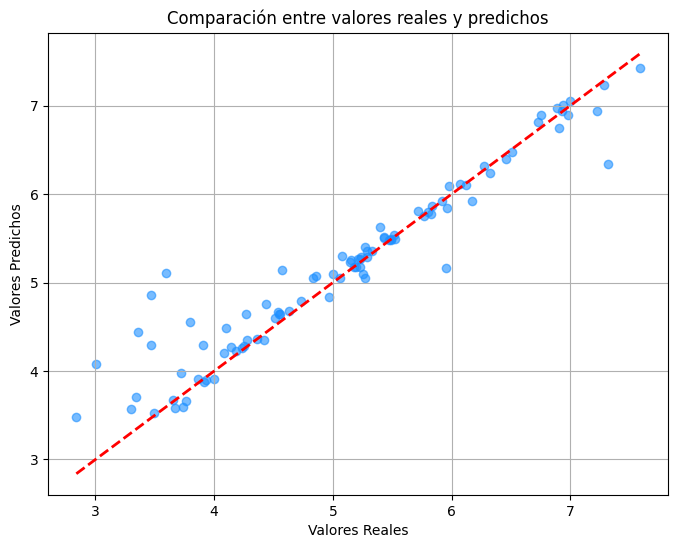

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre valores reales y predichos')
plt.grid(True)
plt.show()

### 🧮 Distribución de Errores

Este histograma muestra los errores (residuos) del modelo.  
Un buen modelo debería tener errores centrados cerca de 0 y una forma simétrica, lo que indica que no hay sesgo sistemático.


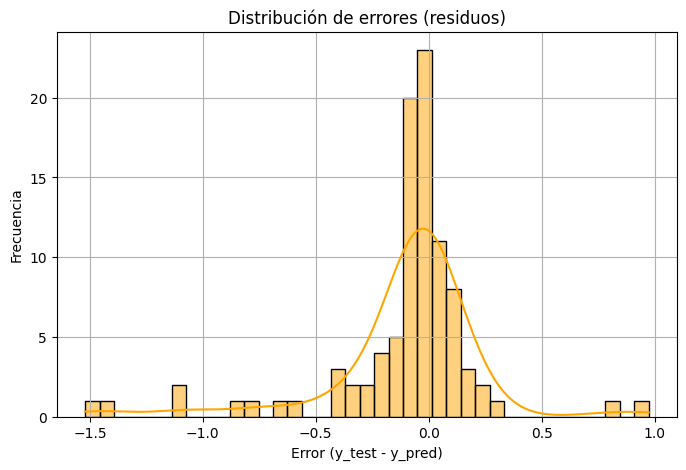

In [21]:
errors = y_test - y_pred

plt.figure(figsize=(8, 5))
sns.histplot(errors, kde=True, color='orange')
plt.title('Distribución de errores (residuos)')
plt.xlabel('Error (y_test - y_pred)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()
